In [ ]:
from sklearn import datasets
import pandas as pd

**Loading the dataset**

In [ ]:
df = datasets.load_iris(as_frame=True)['data']
df['target'] = datasets.load_iris(as_frame=True)['target']
target_names = datasets.load_iris(as_frame=True)['target_names']
df['species'] = df['target'].apply(lambda x: target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Creating Data groups**

In [ ]:
setosa = df[df['target'] == 0]['sepal length (cm)'].sample(n=30)
versicolor = df[df['target'] == 1]['sepal length (cm)'].sample(n=30)
virginica = df[df['target'] == 2]['sepal length (cm)'].sample(n=30)

setosa


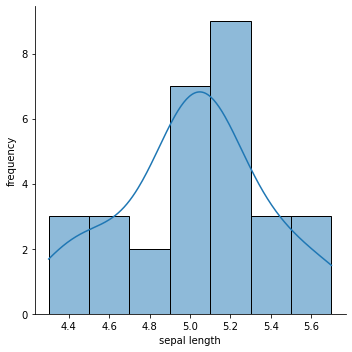

versicolor


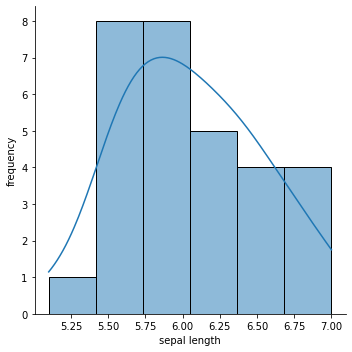

virginica


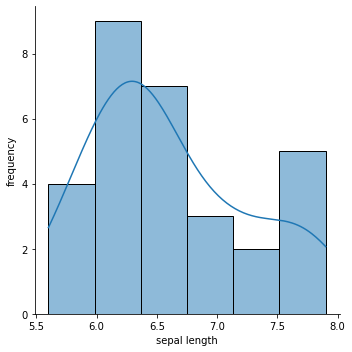

In [ ]:
# Checking for Normal distribution of the groups
import matplotlib.pyplot as plt
import seaborn as sns


print('setosa')
sns.displot(setosa, kde=True)
plt.xlabel("sepal length")
plt.ylabel("frequency")
plt.show()

print('versicolor')
sns.displot(versicolor, kde=True)
plt.xlabel("sepal length")
plt.ylabel("frequency")
plt.show()

print('virginica')
sns.displot(virginica, kde=True)
plt.xlabel("sepal length")
plt.ylabel("frequency")
plt.show()

In [ ]:
import numpy as np

print("Variance\n")
print("setosa: ",np.var(setosa))
print("versicolor: ",np.var(versicolor))
print("virginica: ",np.var(virginica))

Variance

setosa:  0.12490000000000001
versicolor:  0.20915555555555565
virginica:  0.4036555555555557


In [ ]:
#Checking for equal variances
from scipy.stats import levene

alpha = 0.05

w_stats, pvalue = levene(setosa, versicolor, virginica)

print("w_stats: ", w_stats, "pvalue: ",pvalue)

if pvalue > alpha:
  print("We failed to reject the Null Hypothesis. The three groups have equal variance")
else:
  print("We reject the Null Hypothesis. The three groups do not have equal variance")

w_stats:  3.9638201747889292 pvalue:  0.022516747907258258
We reject the Null Hypothesis. The three groups do not have equal variance


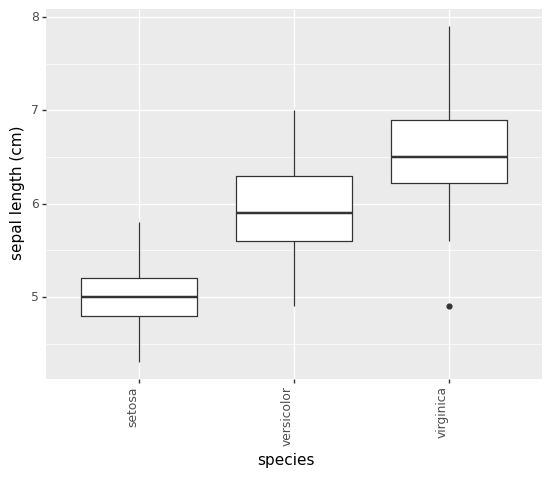

<ggplot: (8742062476156)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot, theme, element_text
  
#Visualizing the mean plots
ggplot(df) + aes(x="species", y="sepal length (cm)") + geom_boxplot() + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

**Performing One-way ANOVA**

**<i> Null Hypothesis : Mean(setosa) = Mean(versicolor) = Mean(virginica) <br>
Alternate Hypothesis : Mean of atleast one among setosa, versicolor and virginica differs from the mean of others </i>**

In [ ]:
from scipy.stats import f_oneway

f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=77.24088020001801, pvalue=5.171529363062282e-20)

**Interpreting the Results**

Considering significance level of 0.05, <br>
We can see that pvalue < 0.05 <br>
Implies we reject the Null Hypothesis <br> <br>
<i> <b> Conclusion : Mean of atleast one among setosa, versicolor and virginica differs from the mean of others </b> </i>

In [ ]:
import pandas as pd

In [ ]:
df_crop = pd.read_csv('crop_data.csv')
df_crop.head()

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [ ]:
df_crop = df_crop.rename(columns={'yield':'yield1'})

In [ ]:
df_crop['density'] = df_crop['density'].astype('string')
df_crop['fertilizer'] = df_crop['fertilizer'].astype('string')

In [ ]:
df_crop.columns

Index(['density', 'block', 'fertilizer', 'yield1'], dtype='object')

**Checking for NULL Values**

In [ ]:
df_crop.isna().sum()

density       0
block         0
fertilizer    0
yield1        0
dtype: int64

**Our Factors : density, fertilizer**


In [ ]:
density_values = df_crop['density'].unique()
print("No of levels in factor density: ", len(density_values))
fertilizer_values = df_crop['fertilizer'].unique()
print("No of levels in factor fertilizer: ", len(fertilizer_values))

No of levels in factor density:  2
No of levels in factor fertilizer:  3


In [ ]:
df_crop.groupby(['density','fertilizer']).agg({'yield1': 'count'})

yield1
density fertilizer        
1       1               16
        2               16
        3               16
2       1               16
        2               16
        3               16

**Visualizing the data**

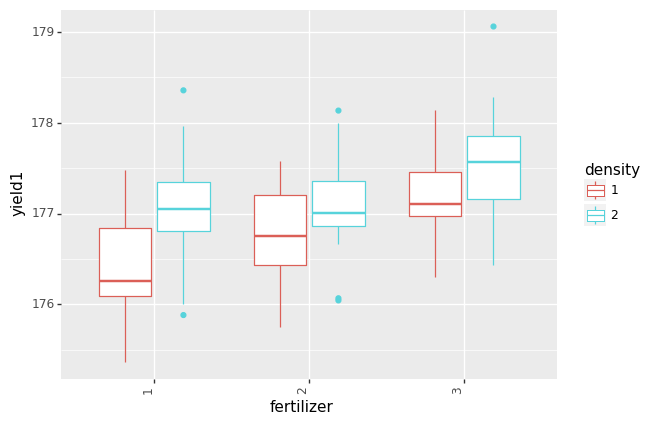

<ggplot: (8766544694574)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot, theme, element_text
ggplot(df_crop) + aes(x="fertilizer", y="yield1", color="density") + geom_boxplot() + theme(axis_text_x  = element_text(angle = 90, hjust = 1))  

Two factor ANOVA requires performing three F-tests which assumes the following Null hypothesis and Alteranate hypothesis for each test.

**Denisty:**<br>
Null Hypothesis: Mean(density=1) = Mean(density=2) <br>
Alternate Hypothesis: Mean(density=1) not equals Mean(density=2)<br>

**fertilizer:**<br>
Null Hypothesis: Mean(fertilizer=1) = Mean(fertilizer=2) = Mean(fertilizer=3)<br>
Alternate Hypothesis: Atleast one of the mean is different from the others.<br>

**Interactions between density and fertilizer:**<br>
Null hypothesis: Density and fertilizer do not interact to impact the yield.<br>
Alternate hypothesis: Density and fertilizer interact to impact the yield.

In [ ]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("yield1 ~ density + fertilizer + density:fertilizer", data = df_crop).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
density,5.121681,1.0,15.229727,0.000181
fertilizer,5.743223,1.0,17.077932,0.000079
density:fertilizer,0.150187,1.0,0.446593,0.505630
Residual,30.939141,92.0,NaN,NaN


Conclusions:

**density:**<br>
p-value = 0.000181 < 0.05.<br>
We reject the Null hypothesis. <br>
We conclude that factor density does impact the differences in the yield.<br>

**fertilizer:**<br>
p-value = 0.000079 < 0.05.<br>
We reject the Null hypothesis. <br>
We conclude that factor fertilizer does impact the differences in the yield.<br>

**density:fertilizer:**<br>
p-value = 0.505630 > 0.05.<br>
We failed to reject the Null hypothesis. <br>
We conclude that Density and fertilizer do not interact to impact the yield.<br>





